### Dingen die ik moet beheersen:
* R-squared:
* coef
* P>|t|

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

%config IPCompleter.greedy = True
%matplotlib inline

data = pd.read_csv('Data/financials.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Segment              700 non-null    object
 1   Country              700 non-null    object
 2   Product              700 non-null    object
 3   Discount Band        700 non-null    object
 4   Units Sold           700 non-null    object
 5   Manufacturing Price  700 non-null    object
 6   Sale Price           700 non-null    object
 7   Gross Sales          700 non-null    object
 8   Discounts            700 non-null    object
 9   Sales                700 non-null    object
 10  COGS                 700 non-null    object
 11  Profit               700 non-null    object
 12  Date                 700 non-null    object
 13  Month Number         700 non-null    int64 
 14  Month Name           700 non-null    object
 15  Year                 700 non-null    int64 
dtypes: int64

In [13]:
data.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [34]:
# Specifieke kolommen omzetten naar floats
columns_to_convert = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Sales', 'COGS', 'Profit']

# Converteer kolommen naar floats door ongewenste tekens eerst te verwijderen
for column in columns_to_convert:
    data[column] = data[column].replace({',': '', '\\$': ''}, regex=True).astype(float)

data.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,$-,32370.0,16185.0,16185.0,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,$-,26420.0,13210.0,13210.0,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,$-,32670.0,21780.0,10890.0,01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,$-,13320.0,8880.0,4440.0,01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,$-,37050.0,24700.0,12350.0,01/06/2014,6,June,2014


In [36]:
data

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,$-,32370.00,16185.0,16185.00,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,$-,26420.00,13210.0,13210.00,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,$-,32670.00,21780.0,10890.00,01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,$-,13320.00,8880.0,4440.00,01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,$-,37050.00,24700.0,12350.00,01/06/2014,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260.0,300.0,742500.0,"$1,11,375.00",631125.00,618750.0,12375.00,01/03/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,260.0,300.0,163800.0,"$24,570.00",139230.00,136500.0,2730.00,01/10/2014,10,October,2014
697,Government,Mexico,Montana,High,1368.0,5.0,7.0,9576.0,"$1,436.40",8139.60,6840.0,1299.60,01/02/2014,2,February,2014
698,Government,Canada,Paseo,High,723.0,10.0,7.0,5061.0,$759.15,4301.85,3615.0,686.85,01/04/2014,4,April,2014


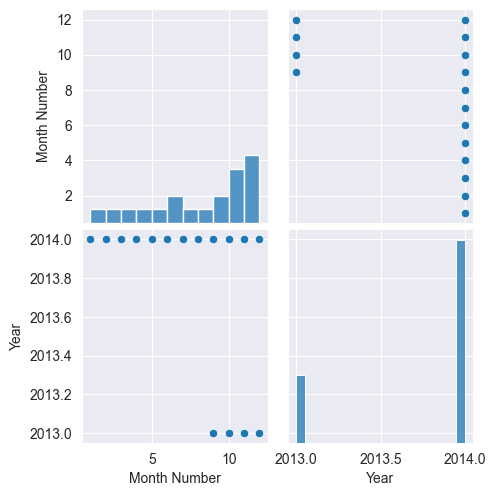

In [19]:
sns.pairplot(data)

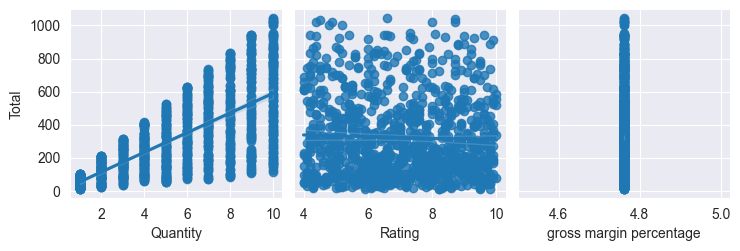

In [11]:
non_cat_vars = ['Quantity','Rating', 'gross margin percentage']
#mpg toegevoegd omdat hij anders de dsp grafiek leeg liet (bug?)
sns.pairplot(data, y_vars=['Total'], x_vars = non_cat_vars, kind='reg')